In [ ]:
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

In [19]:
file = open(r"/content/drive/MyDrive/sherlock.txt",encoding='utf-8')

In [20]:
#Remove \n occurence
wordslist = file.read().splitlines() 
T1 = ""
T1 = T1.join(wordslist)
T1[:500]

'I. A SCANDAL IN BOHEMIAI.To Sherlock Holmes she is always _the_ woman. I have seldom heard himmention her under any other name. In his eyes she eclipses andpredominates the whole of her sex. It was not that he felt any emotionakin to love for Irene Adler. All emotions, and that one particularly,were abhorrent to his cold, precise but admirably balanced mind. Hewas, I take it, the most perfect reasoning and observing machine thatthe world has seen, but as a lover he would have placed himself in a'

In [21]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
text = ""
for char in T1:
    if char not in punctuations:
        text += char
T1=text
T1[:500]

'I A SCANDAL IN BOHEMIAITo Sherlock Holmes she is always the woman I have seldom heard himmention her under any other name In his eyes she eclipses andpredominates the whole of her sex It was not that he felt any emotionakin to love for Irene Adler All emotions and that one particularlywere abhorrent to his cold precise but admirably balanced mind Hewas I take it the most perfect reasoning and observing machine thatthe world has seen but as a lover he would have placed himself in afalse position '

In [22]:
#Converting the text into lower case       
T1 = T1.lower()
T1[:500]

'i a scandal in bohemiaito sherlock holmes she is always the woman i have seldom heard himmention her under any other name in his eyes she eclipses andpredominates the whole of her sex it was not that he felt any emotionakin to love for irene adler all emotions and that one particularlywere abhorrent to his cold precise but admirably balanced mind hewas i take it the most perfect reasoning and observing machine thatthe world has seen but as a lover he would have placed himself in afalse position '

In [23]:
#Remove numbers
T1 = re.sub(r'\d+','',T1)
T1[:500]

'i a scandal in bohemiaito sherlock holmes she is always the woman i have seldom heard himmention her under any other name in his eyes she eclipses andpredominates the whole of her sex it was not that he felt any emotionakin to love for irene adler all emotions and that one particularlywere abhorrent to his cold precise but admirably balanced mind hewas i take it the most perfect reasoning and observing machine thatthe world has seen but as a lover he would have placed himself in afalse position '

In [ ]:
#Remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
remove_whitespace(T1)

In [25]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas
lemmatize_word(T1)
T1[:500]

'i a scandal in bohemiaito sherlock holmes she is always the woman i have seldom heard himmention her under any other name in his eyes she eclipses andpredominates the whole of her sex it was not that he felt any emotionakin to love for irene adler all emotions and that one particularlywere abhorrent to his cold precise but admirably balanced mind hewas i take it the most perfect reasoning and observing machine thatthe world has seen but as a lover he would have placed himself in afalse position '

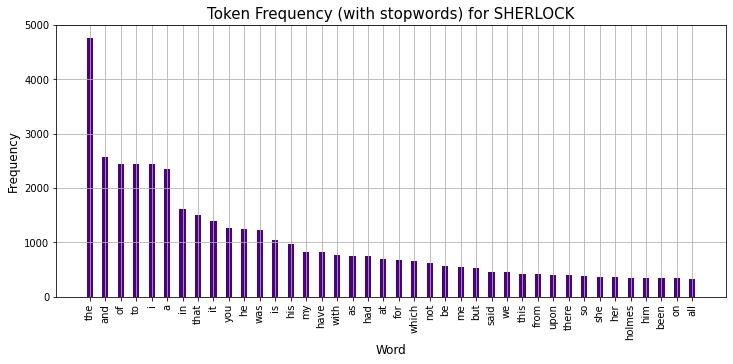

In [26]:
#Frequency distribution of tokens(with stopwords)
tokens = word_tokenize(T1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords) for SHERLOCK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

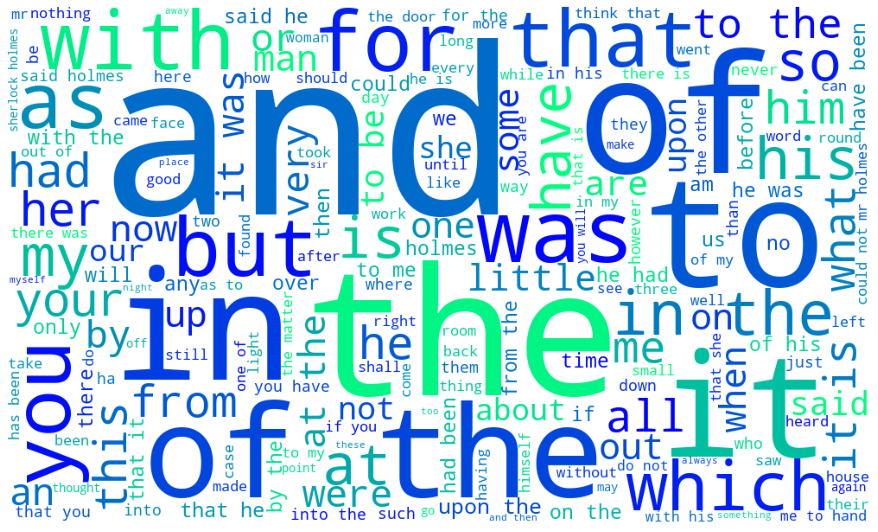

In [27]:
#Wordcloud (with stopwords)
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 5,stopwords = {},colormap='winter').generate(T1) 
plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [28]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(T1)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
text = " "
text = text.join(tokens_final)
T1=text
T1[:500]

'scandal bohemiaito sherlock holmes always woman seldom heard himmention name eyes eclipses andpredominates whole sex felt emotionakin love irene adler emotions one particularlywere abhorrent cold precise admirably balanced mind hewas take perfect reasoning observing machine thatthe world seen lover would placed afalse position never spoke softer passions save gibeand sneer admirable things observer—excellent fordrawing veil mens motives actions trainedreasoner admit intrusions delicate finelyadj'

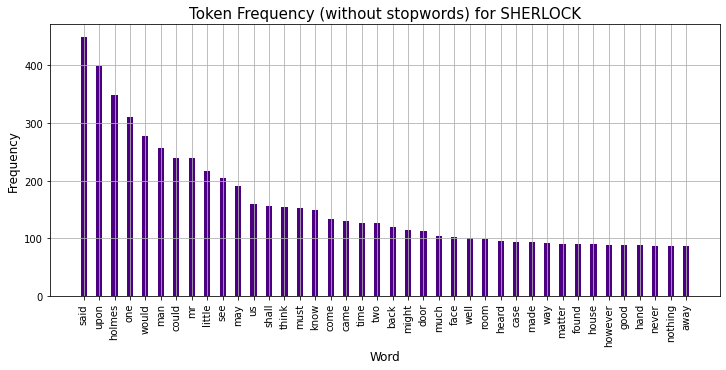

In [29]:
#Frequency distribution of tokens(without stopwords)
tokens = word_tokenize(T1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords) for SHERLOCK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

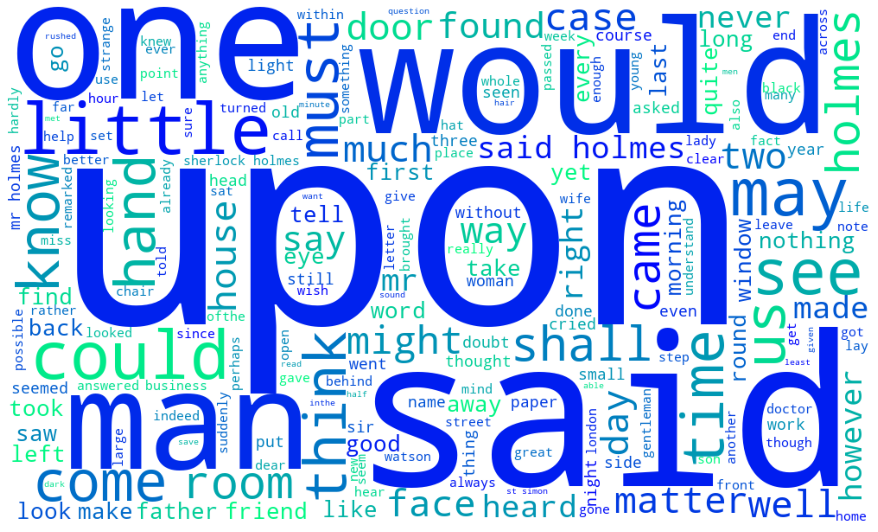

In [30]:
#Word cloud after removing stopwords
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                min_font_size = 5,stopwords = {},colormap='winter').generate(T1) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

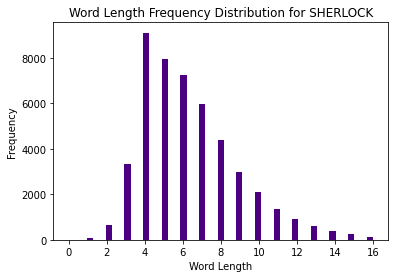

In [31]:
bin_size=np.linspace(0,16)
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size,color='indigo')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Frequency Distribution for SHERLOCK')
plt.show()

In [32]:
#POS tags
tagged = nltk.pos_tag(tokens) 
tagged[:10] 

[('scandal', 'NN'),
 ('bohemiaito', 'NN'),
 ('sherlock', 'NN'),
 ('holmes', 'NNS'),
 ('always', 'RB'),
 ('woman', 'NN'),
 ('seldom', 'RB'),
 ('heard', 'VBN'),
 ('himmention', 'NN'),
 ('name', 'NN')]

In [36]:
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 15837, 'JJ': 8860, 'VBD': 4081, 'NNS': 3711, 'RB': 3572, 'VBP': 2025, 'VB': 1742, 'VBN': 1680, 'VBG': 1607, 'IN': 1263, 'MD': 1153, 'CD': 650, 'VBZ': 545, 'PRP': 196, 'JJR': 152, 'DT': 132, 'JJS': 131, 'WP': 129, 'RP': 87, 'RBR': 80, 'NNP': 51, 'FW': 47, 'CC': 35, 'WDT': 32, 'WP$': 16, 'WRB': 12, 'RBS': 7, 'UH': 4, 'PRP$': 4, 'EX': 2})


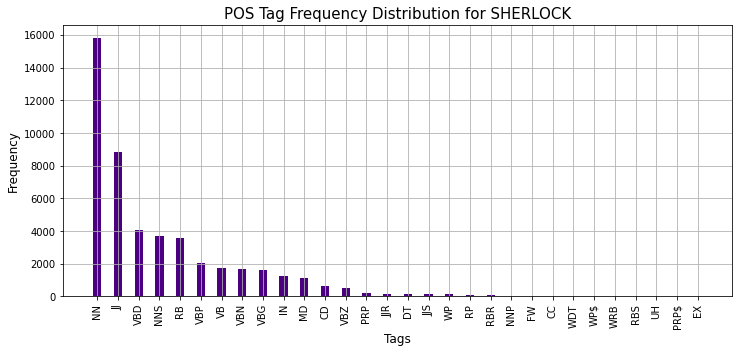

In [34]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('POS Tag Frequency Distribution for SHERLOCK',size=15)
plt.xlabel('Tags',size=12)
plt.ylabel('Frequency',size=12)
plt.show()